In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/countrydata/Project_3/Country-data.csv
/kaggle/input/countrydata/Project_3/data-dictionary.csv
/kaggle/input/countrydata/Project_3/TP-Project-3.docx


In [2]:
ds= pd.read_csv('/kaggle/input/countrydata/Project_3/Country-data.csv',index_col='country')
ds

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310


In [3]:
#standardization the dataset
numerical_columns = ds.select_dtypes(include=['float64', 'int64']).columns
mean=np.mean(ds,axis=0)
std=np.std(ds,axis=0)
ds=(ds-mean)/std
ds

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
Vanuatu,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
Venezuela,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
Vietnam,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754


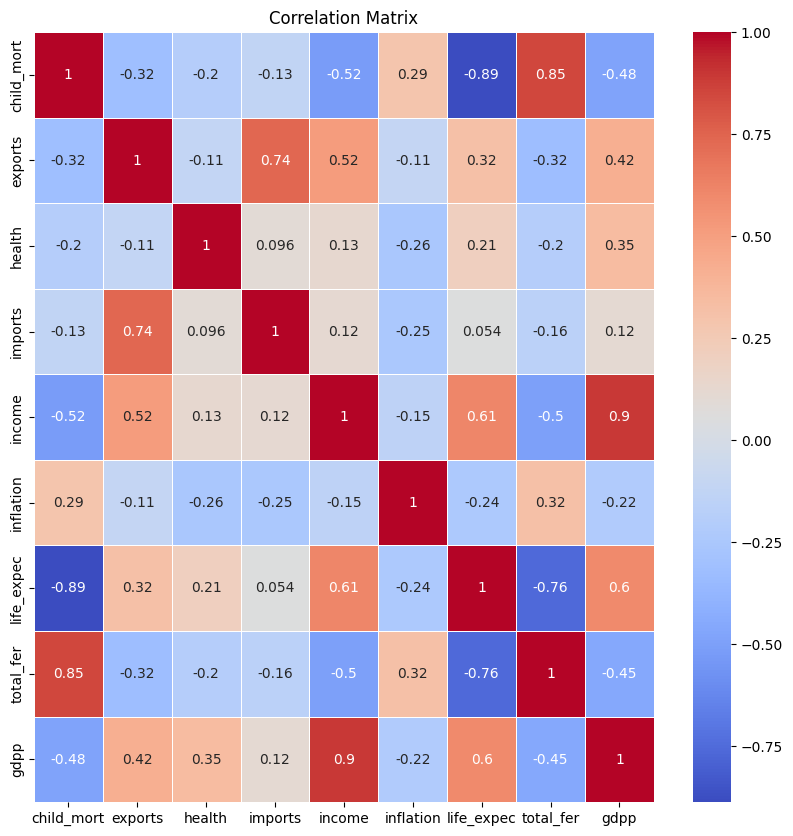

In [4]:
#making a correlation matrix
c_mat=ds.corr()
plt.figure(figsize=(10,10))
sns.heatmap(c_mat, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

In [5]:
class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.variance_ratio=None

    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance matrix transposed 
        cov = np.cov(X.T)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov)

        eigenvectors = eigenvectors.T

        # sorting the eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]
        self.variance_ratio=eigenvalues/np.sum(eigenvalues)

        self.components = eigenvectors[0:self.n_components]

    def transform(self, X):
        # projecting data
        X = X - self.mean
        return np.dot(X, self.components.T)


In [6]:
# checking the variance ratio
pca = PCA(9)
pca.fit(ds)
ds_projected = pca.transform(ds)
print("variance ratio : ",pca.variance_ratio)




variance ratio :  [0.4595174  0.17181626 0.13004259 0.11053162 0.07340211 0.02484235
 0.0126043  0.00981282 0.00743056]


Text(0.5, 1.0, 'Scree Plot')

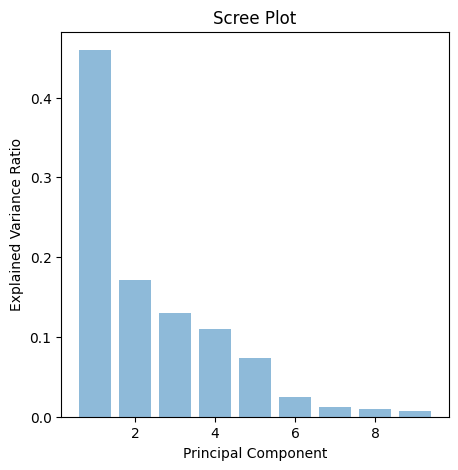

In [7]:
plt.figure(figsize=(5,5))
plt.bar(range(1, len(pca.variance_ratio) + 1),pca.variance_ratio, alpha=0.5)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')

In [8]:
np.random.seed(42)
class KMeansPCA:
    def __init__(self, k, itr):
        self.k = k
        self.itr = itr
        self.labels = None
        self.centroids = None
        self.sil = None
        self.iner = None
    #Using Kmeans++
    def fit(self, data):
        self.centroids = [data[np.random.choice(data.shape[0])]]

        for _ in range(1, self.k):
            distances = np.linalg.norm(data[:, np.newaxis, :] - np.array(self.centroids), axis=2)
            probabilities = distances.min(axis=1) / distances.min(axis=1).sum()
            next_centroid_index = np.random.choice(data.shape[0], p=probabilities)
            self.centroids.append(data[next_centroid_index])

        for _ in range(self.itr):
            distances = np.linalg.norm(data[:, np.newaxis, :] - np.array(self.centroids), axis=2)
            self.labels = np.argmin(distances, axis=1)
            self.centroids = [data[self.labels == j].mean(axis=0) for j in range(self.k)]

        # Calculating silhouette and inertia
        self.sil = silhouette_score(data, self.labels)
        self.iner = ((data - np.array([self.centroids[j] for j in self.labels])) ** 2).sum()

        return self.labels



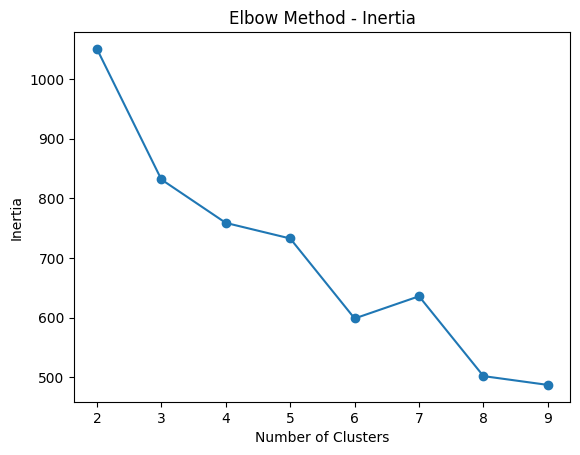

In [9]:
# using elbow method for Inertia
inertia_scores = []
for k in range(2,10):
    kmeans_pca = KMeansPCA(k, 500)
    kmeans_pca.fit(ds_projected)
    inertia_scores.append(kmeans_pca.iner)


plt.plot(range(2,10), inertia_scores, marker='o')
plt.title('Elbow Method - Inertia')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

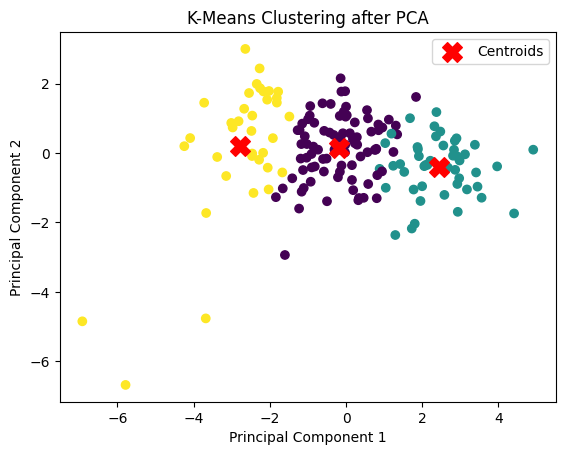

Silhouette Score: 0.28329575683463126


In [10]:
kmeans_pca = KMeansPCA(3, 500)
labels = kmeans_pca.fit(ds_projected)

pc1 = ds_projected[:, 0]
pc2 = ds_projected[:, 1]

plt.scatter(pc1, pc2, c=kmeans_pca.labels, cmap='viridis')
plt.scatter(np.array(kmeans_pca.centroids)[:, 0], np.array(kmeans_pca.centroids)[:, 1],c='red', marker='X', s=200, label='Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering after PCA')
plt.legend()
plt.show()

silhouette_score_value = silhouette_score(ds_projected, kmeans_pca.labels)
print('Silhouette Score:',silhouette_score_value)